![HACKTIV8](datasets/h8.png)

---
# Capstone Project 4

Nama Anggota:
1. Oktaviani (PYTN-KS16-002)
2. Gladis Hafifah (PYTN-KS16-001)
3. Muhammad Rayhan Assegaf (PYTN-KS16-022)
---

## Introduction

Dalam dunia keuangan, pemahaman yang mendalam terhadap cara konsumen berperilaku menjadi krusial untuk memperbaiki layanan dan meningkatkan pengalaman pengguna. Dengan mengumpulkan data transaksi dari 9000 pengguna kartu kredit selama 6 bulan, memiliki 18 attributes dan 8950 entries yang mencakup informasi rinci seperti jenis pembelian, lokasi, jumlah pembayaran, dan lainnya, proyek ini bertujuan untuk mengidentifikasi pola pengeluaran unik dari masing-masing individu. Melalui penerapan konsep Clustering dengan menggunakan algoritma Scikit-Learn, tujuannya adalah untuk mengelompokkan pengguna berdasarkan aktivitasnya.

Hasil dari penerapan Clustering pada dataset diharapkan dapat mengungkap kelompok-kelompok pengguna dengan perilaku serupa. Dengan memahami lebih baik preferensi dan kebiasaan pengguna melalui data ini, proyek ini dapat memberikan solusi untuk perusahaan keuangan, seperti penyesuaian strategi pemasaran, peningkatan penawaran produk, dan peningkatan keamanan untuk mendeteksi aktivitas yang mencurigakan.

This dataset contains:
- CUST_ID - Identifikasi pemegang Kartu Kredit (Kategorikal).
- BALANCE - Jumlah saldo yang tersisa di akun mereka untuk melakukan pembelian.
- BALANCE_FREQUENCY - Seberapa sering saldo diperbarui, nilai antara 0 dan 1 (1 = sering diperbarui, 0 = tidak sering diperbarui).
- PURCHASES - Jumlah pembelian yang dilakukan dari akun.
- ONE_OFF_PURCHASES - Jumlah pembelian maksimum yang dilakukan dalam sekali transaksi.
- INSTALLMENTS_PURCHASES - Jumlah pembelian yang dilakukan secara cicilan.
- CASH_ADVANCE - Uang tunai di muka yang diberikan oleh pengguna.
- PURCHASES_FREQUENCY - Seberapa sering Pembelian dilakukan, beri skor antara 0 dan 1 (1 = sering dibeli, 0 = tidak sering dibeli).
- ONE_OFF_PURCHASES_FREQUENCY - Seberapa sering Pembelian dilakukan dalam sekali belanja (1 = sering dibeli, 0 = tidak sering dibeli).
- PURCHASES_INSTALLMENENT_FREQUENCY - Seberapa sering pembelian secara cicilan yang dilakukan (1 = sering dilakukan, 0 = tidak sering dilakukan).
- CASH_ADVANCE_FREQUENCY - Seberapa sering pembayaran uang muka dilakukan.
- CASH_ADVANCE_TRX - Jumlah Transaksi yang dilakukan dengan "Uang Muka".
- PURCHASES_TRX - Jumlah transaksi pembelian yang dilakukan.
- CREDIT_LIMIT - Batas Kartu Kredit untuk pengguna.
- PAYMENTS - Jumlah Pembayaran yang dilakukan oleh pengguna.
- MINIMUM_PAYMENTS - Jumlah minimum pembayaran yang dilakukan oleh pengguna.
- PRC_FULLPAYMENT - Persentase pembayaran penuh yang dibayarkan oleh pengguna.
- TENURE - Jangka waktu layanan kartu kredit untuk pengguna.


## Objective

- Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
- Mampu mempersiapkan data untuk digunakan dalam Clustering
- Mampu mengimplementasikan Clustering pada data yang diberikan


---
---

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [2]:
data = pd.read_csv('datasets/CC GENERAL.csv')

In [3]:
data.columns = data.columns.str.lower()
data.head()

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8950 non-null   object 
 1   balance                           8950 non-null   float64
 2   balance_frequency                 8950 non-null   float64
 3   purchases                         8950 non-null   float64
 4   oneoff_purchases                  8950 non-null   float64
 5   installments_purchases            8950 non-null   float64
 6   cash_advance                      8950 non-null   float64
 7   purchases_frequency               8950 non-null   float64
 8   oneoff_purchases_frequency        8950 non-null   float64
 9   purchases_installments_frequency  8950 non-null   float64
 10  cash_advance_frequency            8950 non-null   float64
 11  cash_advance_trx                  8950 non-null   int64  
 12  purcha

In [5]:
data.columns

Index(['cust_id', 'balance', 'balance_frequency', 'purchases',
       'oneoff_purchases', 'installments_purchases', 'cash_advance',
       'purchases_frequency', 'oneoff_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments',
       'minimum_payments', 'prc_full_payment', 'tenure'],
      dtype='object')

In [6]:
data.nunique()

cust_id                             8950
balance                             8871
balance_frequency                     43
purchases                           6203
oneoff_purchases                    4014
installments_purchases              4452
cash_advance                        4323
purchases_frequency                   47
oneoff_purchases_frequency            47
purchases_installments_frequency      47
cash_advance_frequency                54
cash_advance_trx                      65
purchases_trx                        173
credit_limit                         205
payments                            8711
minimum_payments                    8636
prc_full_payment                      47
tenure                                 7
dtype: int64

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
balance,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
balance_frequency,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
purchases,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
oneoff_purchases,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
installments_purchases,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
cash_advance,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
purchases_frequency,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
oneoff_purchases_frequency,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
purchases_installments_frequency,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
cash_advance_frequency,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [8]:
data.shape

(8950, 18)

---
## Data Cleaning

In [9]:
#Menghapus columns cust id karena tidak berpengaruh pada proses clustering
data = data.drop('cust_id', axis=1)

In [10]:
#Mengecheck missing value
data.isnull().sum()

balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

Data diatas menunjukkan bahwa terdapat missing value pada atribut **minimum payments** sebanyak 313, dan atribut **credit_limit**. Karena atrbut credit_limit hanya terdapat satu missing value, maka bisa dihapus saja. Lalu untuk handling missing value pada atribut **minimum_payments** kami akan melakukan explorasi lebih dalam terlebih dahulu.


In [11]:
#Handling missing value credit_limit
data.dropna(subset=['credit_limit'], inplace=True)

In [12]:
#exploarary atribut minimum_payments yang mempunyai missing value
pd.set_option('display.max.rows', None)
data[data['minimum_payments'].isna()]

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,2242.311686,1.000000,437.00,97.00,340.00,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,3910.111237,1.000000,0.00,0.00,0.00,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,6.660517,0.636364,310.00,0.00,310.00,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,1311.995984,1.000000,1283.90,1283.90,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
56,3625.218146,1.000000,313.27,313.27,0.00,668.468743,0.250000,0.250000,0.000000,0.416667,5,4,4000.0,0.000000,NaN,0.0,12
63,7.152356,0.090909,840.00,840.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1600.0,0.000000,NaN,0.0,12
93,1307.717841,1.000000,405.60,405.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,2,2400.0,0.000000,NaN,0.0,12
94,2329.485768,1.000000,213.34,213.34,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,3,2400.0,0.000000,NaN,0.0,12
97,3505.671311,1.000000,0.00,0.00,0.00,1713.984305,0.000000,0.000000,0.000000,0.500000,6,0,4000.0,0.000000,NaN,0.0,12


Hasil dari explorary pada atribut minimum_payments yang memiliki missing value(nilai yang hilang), kami menemukan dua kondisi.
- Pada kondisi pertama missing value terjadi dikarenakan memang tidak adanya transaksi(payments) yang dilakukan oleh client.
- Lalu pada kondisi kedua, missing value terjadi mungkin dikarenakan terdapat kesalahan dalam pengumpulkan data. hal ini bisa kami simpulkan dikarenakan terdapat 57 data client melakukan transaksi (payments) namun minimum_paymentsnya tidak terlihat.

Dari apa yang sudah kami temukan, kami memutuskan untuk menghandle missing value pada atribut minimum_payments dengan cara, pada kondisi pertama kami menggantikan missing value pada minimum payments dengan nilai 0 dan pada kondisi kedua kami menggantikan missing value dengan nilai tengah (median).

In [13]:
def handle_missing_minimum_payments(row):
    if pd.isnull(row['minimum_payments']):
        if row['payments'] == 0:
            return 0
        else:
            return data['minimum_payments'].median()
    else:
        return row['minimum_payments']

data['minimum_payments'] = data.apply(handle_missing_minimum_payments, axis=1)

In [14]:
data.isnull().sum()

balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
dtype: int64

In [15]:
#Checking data duplicate
data.duplicated().any()

False

---
## Eksplorary Data Analysis (EDA)

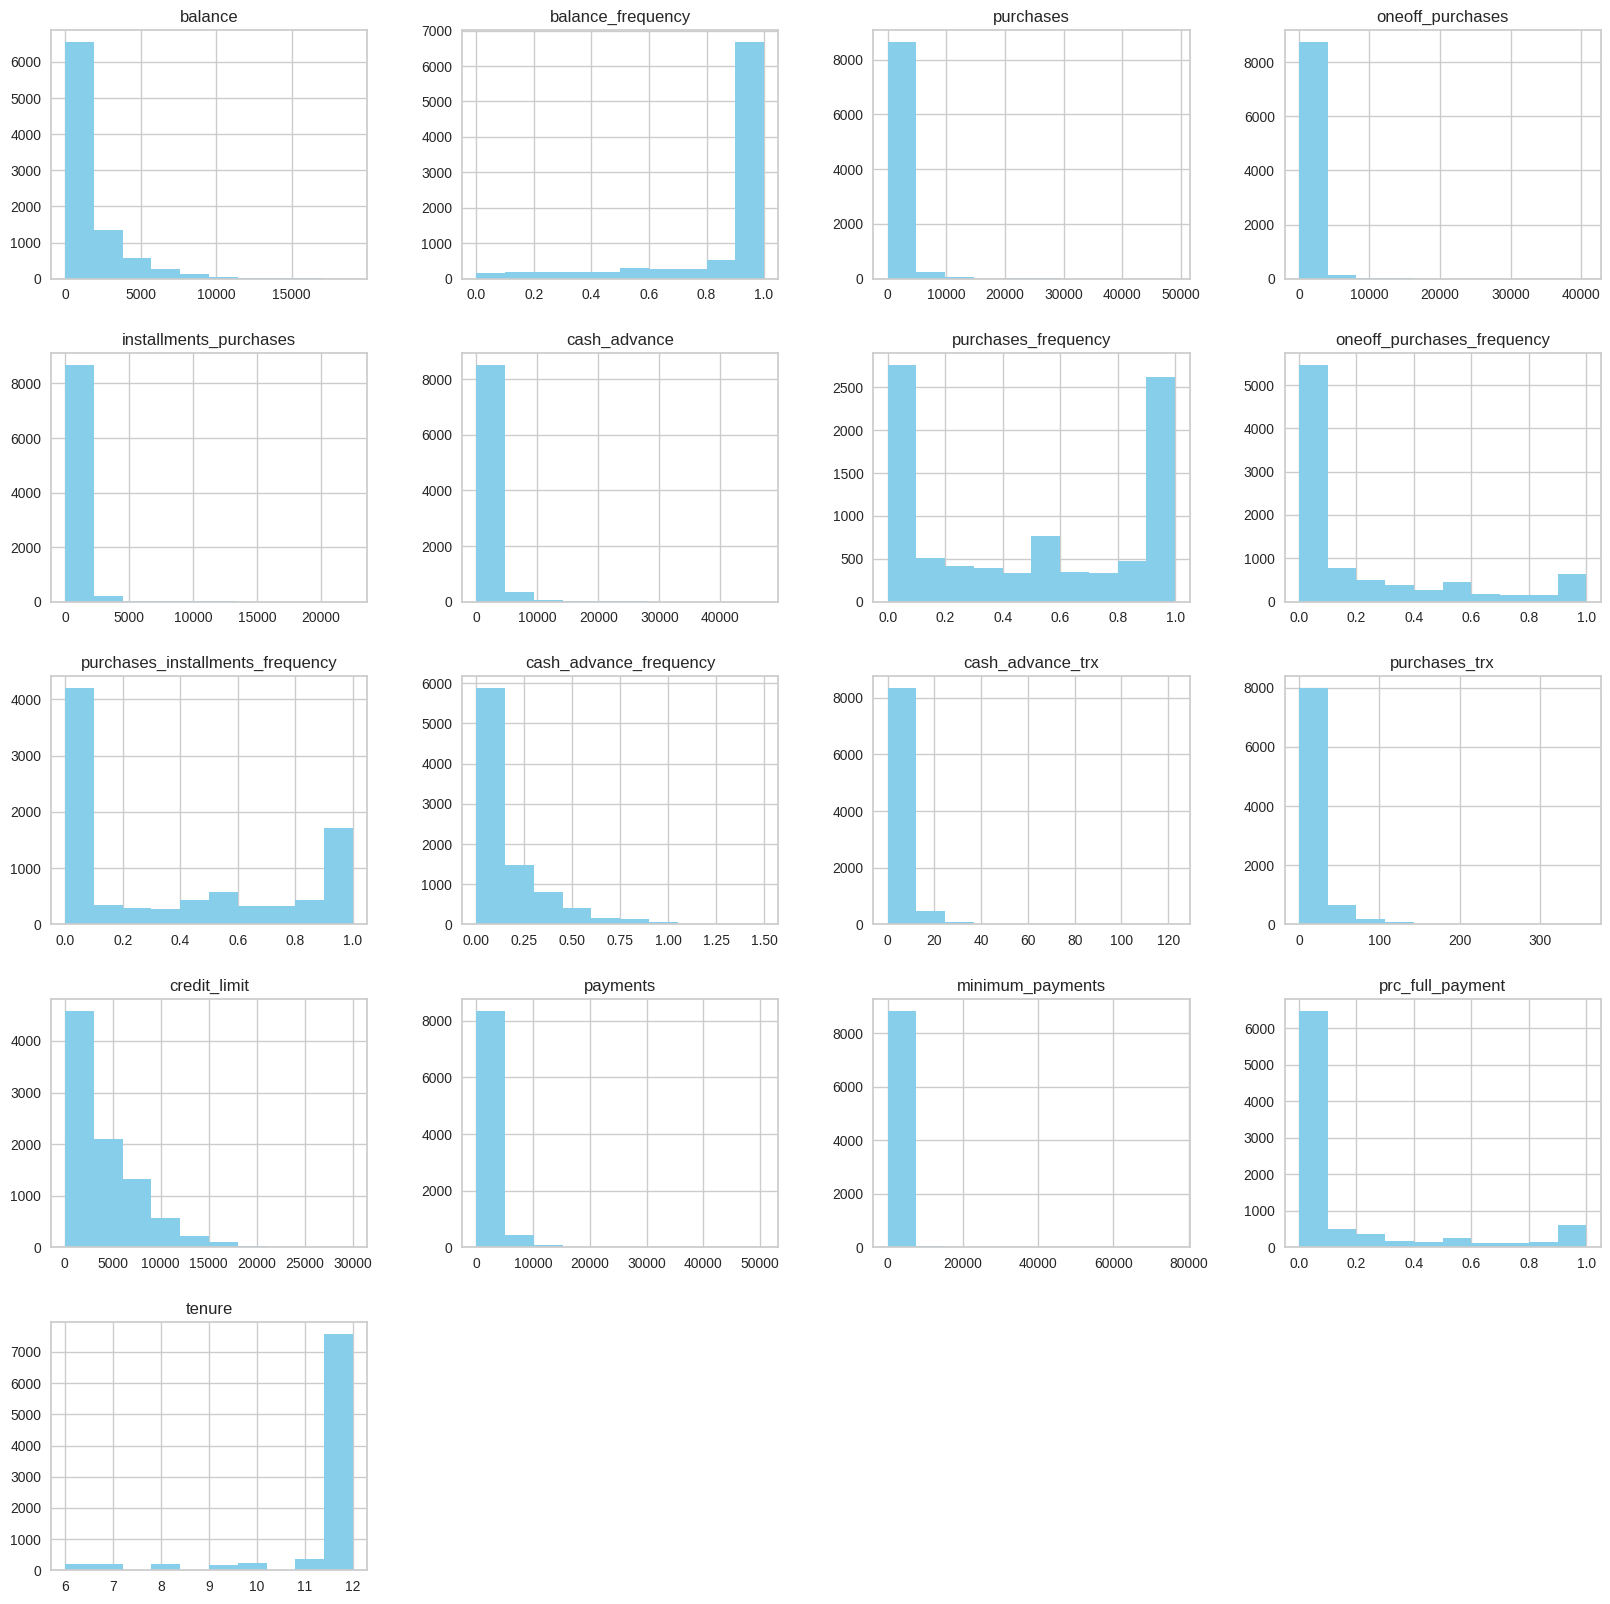

In [16]:
data.hist(figsize=(20, 20), bins=10, color='skyblue')
plt.show()

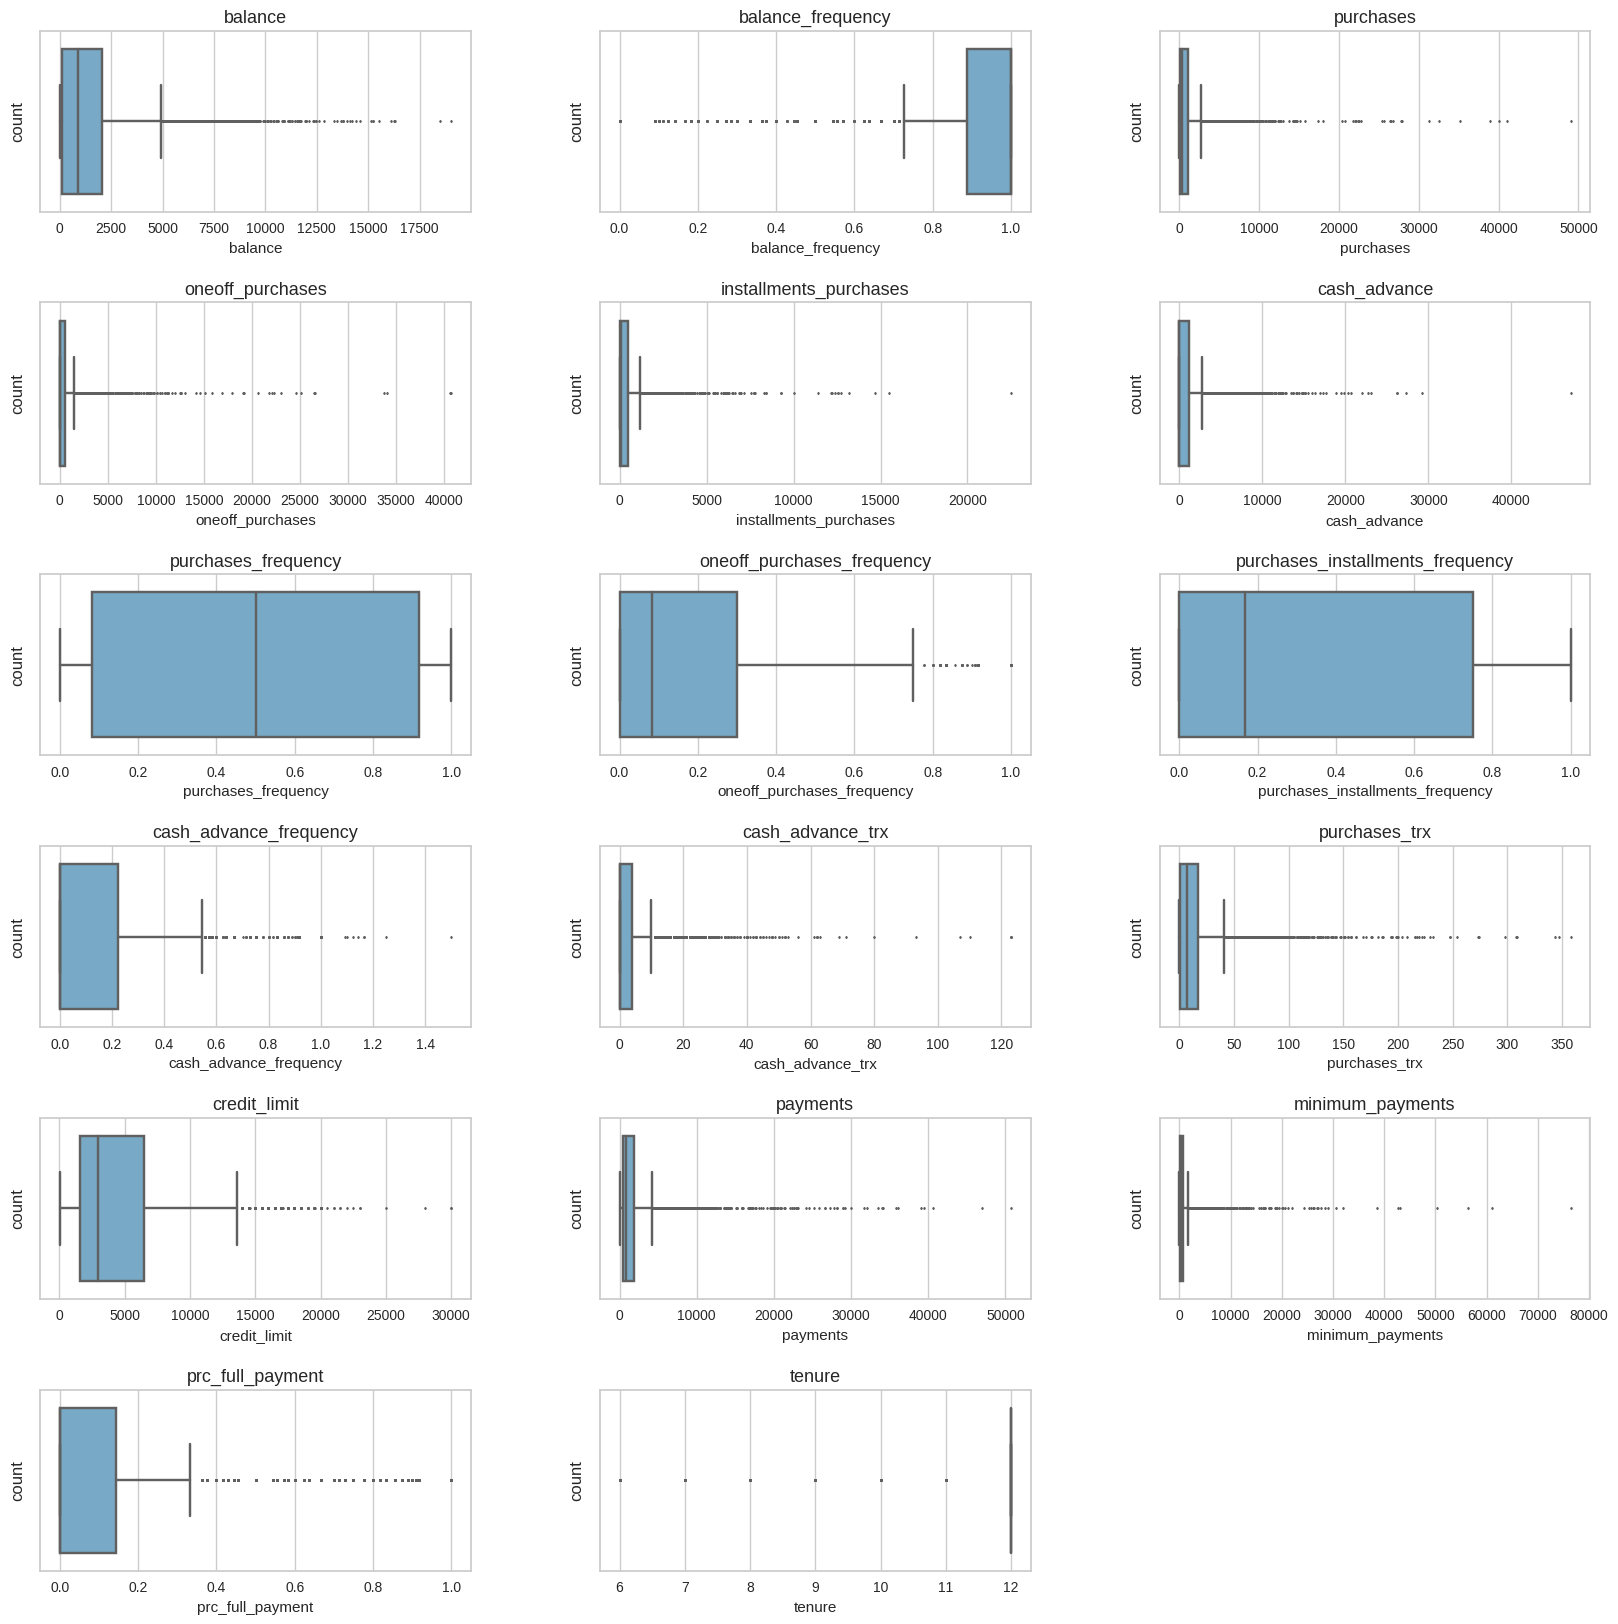

In [17]:
# Checking outlier
cols = data.columns.to_list()
plt.figure(figsize=(20,20))
for i, col in enumerate(cols):
    plt.subplot(6,3,i+1)
    plt.title(col, fontsize=13)
    plt.xlabel(f'skew of {col}:{skew(data[col])}')
    plt.ylabel('count',fontsize=12)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.boxplot(data=data, x=col, palette='Blues', fliersize=1)

Berdasarkan visualisasi di atas banyak atribut yang memiliki nilai extream atau outlier yang bukan disebabkan oleh kesalahan input, hal ini dapat terjadi mungkin client melakukan transaksi yang sangat besar. Maka dari itu kami membiarkan saja agar tidak kehilangan data yang cukup banyak

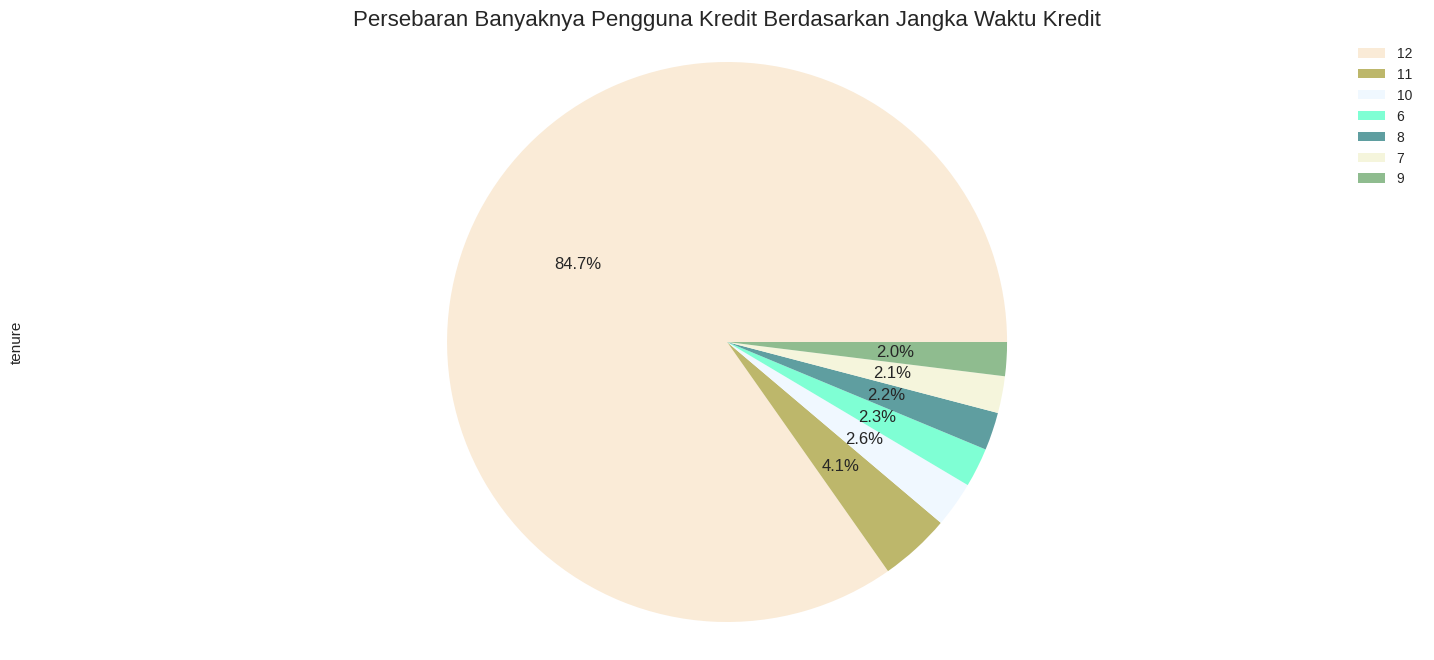

In [18]:
#Melihat jangka waktu kredit pengguna
data_tenure = pd.DataFrame(data['tenure'].value_counts())
color_list=['antiquewhite','darkkhaki', 'aliceblue', 'aquamarine', 'cadetblue', 'beige','darkseagreen' ]

data_tenure.plot(kind='pie', figsize=(18,8), autopct='%1.1f%%', colors=color_list, labels=None, subplots=True)
plt.title('Persebaran Banyaknya Pengguna Kredit Berdasarkan Jangka Waktu Kredit', fontsize=16)
plt.axis('equal')
plt.legend(labels=data_tenure.index)

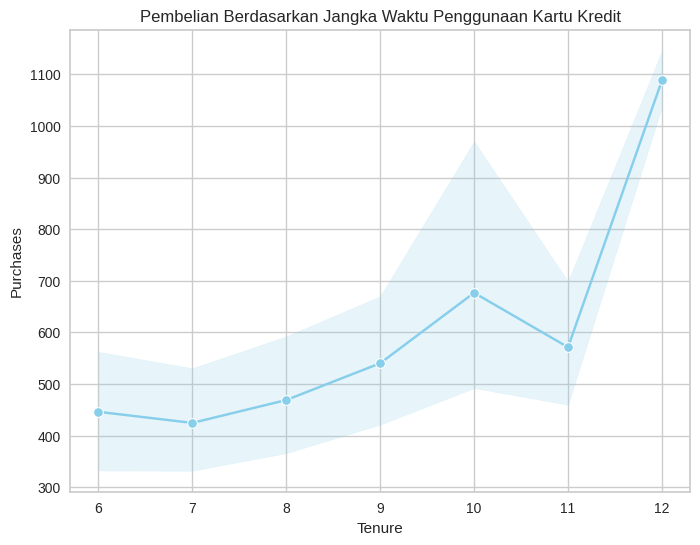

In [19]:
# Pembelian berdasarkan jangka waktu pengguna kartu kredit
plt.figure(figsize=(8, 6))
sns.lineplot(x='tenure', y='purchases', data=data, color='skyblue', marker='o')
plt.title('Pembelian Berdasarkan Jangka Waktu Penggunaan Kartu Kredit')
plt.xlabel('Tenure')
plt.ylabel('Purchases')
plt.show()

**Insight**

Jumlah pembelian mencapai puncaknya pada jangka waktu 12 bulan, mencapai sekitar 85.1%, namun mengalami penurunan pada jangka waktu 11 bulan, sekitar 4.1%.

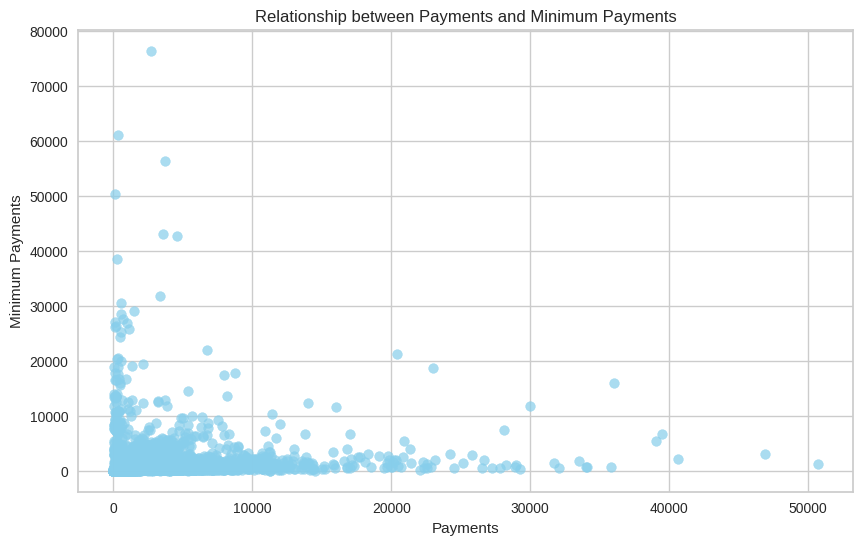

In [20]:
# Hubungan antara Jumlah Pembayaran dan Jumlah Minimum Pembayaran
plt.figure(figsize=(10, 6))
plt.scatter(data['payments'], data['minimum_payments'], color='skyblue', alpha=0.7)
plt.xlabel('Payments')
plt.ylabel('Minimum Payments')
plt.title('Relationship between Payments and Minimum Payments')
plt.grid(True)
plt.show()

 PAYMENTS memiliki pengaruh positif terhadap MINIMUM PAYMENTS.  Rata-rata nilai PAYMENTS adalah 7.000.000. Nilai ini relatif lebih tinggi dibandingkan dengan rata-rata nilai MINIMUM PAYMENTS, yaitu 2.000.000. Hal ini menunjukkan bahwa rata-rata pemegang kartu kredit membayar lebih dari jumlah minimum pembayaran yang dipersyaratkan. Pemegang kartu kredit yang membayar lebih dari jumlah minimum pembayaran yang dipersyaratkan, kemungkinan besar akan memiliki MINIMUM PAYMENTS yang lebih rendah dan riwayat pembayaran yang baik

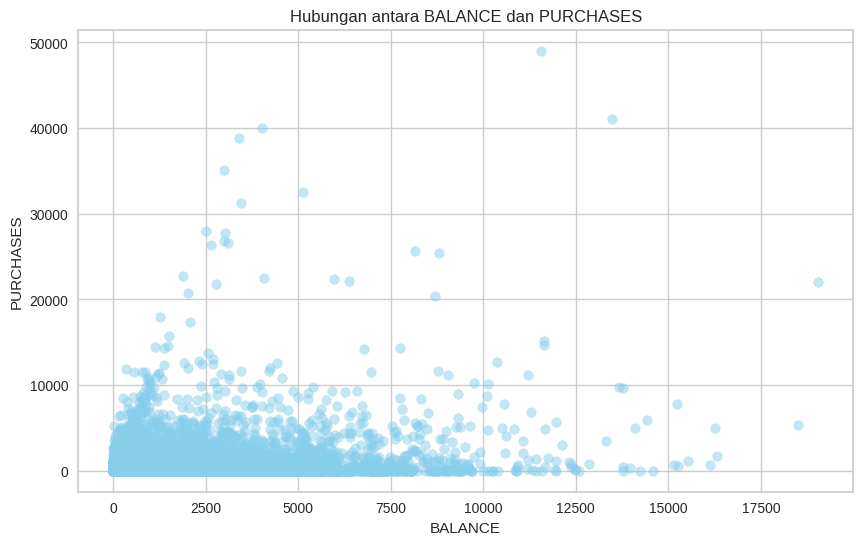

In [21]:
# Hubungan antara balance dan purchases
plt.figure(figsize=(10, 6))
plt.scatter(data['balance'], data['purchases'], color='skyblue', alpha=0.5)
plt.title('Hubungan antara BALANCE dan PURCHASES')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.grid(True)
plt.show()

Terdapat hubungan yang positif antara BALANCE dan PURCHASES.  Rata-rata nilai BALANCE adalah 5.000.000. Nilai ini relatif lebih rendah dibandingkan dengan rata-rata nilai PURCHASES, yaitu 10.000.000. Hal ini menunjukkan bahwa rata-rata pemegang kartu kredit memiliki BALANCE yang lebih rendah daripada PURCHASES-nya. BALANCE memiliki pengaruh positif terhadap PURCHASES. Pemegang kartu kredit dengan BALANCE yang tinggi, kemungkinan besar akan melakukan pembelian yang lebih besar dan lebih mudah.





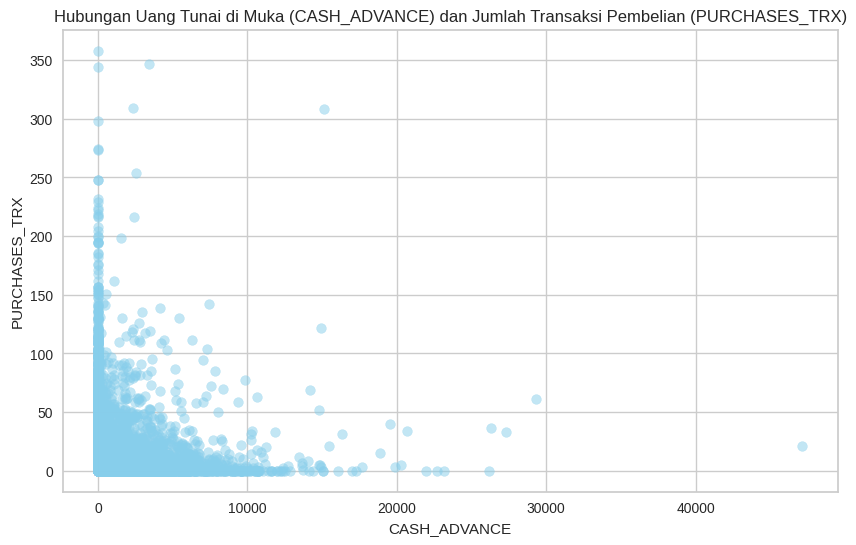

In [22]:
# Hubungan antara cash advance dan purchases_trx
plt.figure(figsize=(10, 6))
plt.scatter(data['cash_advance'], data['purchases_trx'], color='skyblue', alpha=0.5)
plt.title('Hubungan Uang Tunai di Muka (CASH_ADVANCE) dan Jumlah Transaksi Pembelian (PURCHASES_TRX)')
plt.xlabel('CASH_ADVANCE')
plt.ylabel('PURCHASES_TRX')
plt.grid(True)
plt.show()

Uang Tunai di Muka (CASH_ADVANCE) digunakan secara relatif jarang dalam kaitannya dengan Jumlah Transaksi Pembelian (PURCHASES_TRX). Rata-rata nilai CASH_ADVANCE adalah 500.000. Nilai ini relatif rendah dibandingkan dengan rata-rata nilai PURCHASES_TRX, yaitu 1.000.000. Hal ini menunjukkan bahwa rata-rata pemegang kartu kredit menggunakan Uang Tunai di Muka (CASH_ADVANCE) sebesar 50% dari nilai pembeliannya.  Semakin sering Uang Tunai di Muka (CASH_ADVANCE) digunakan, kemungkinan besar semakin sedikit jumlah transaksi pembelian.

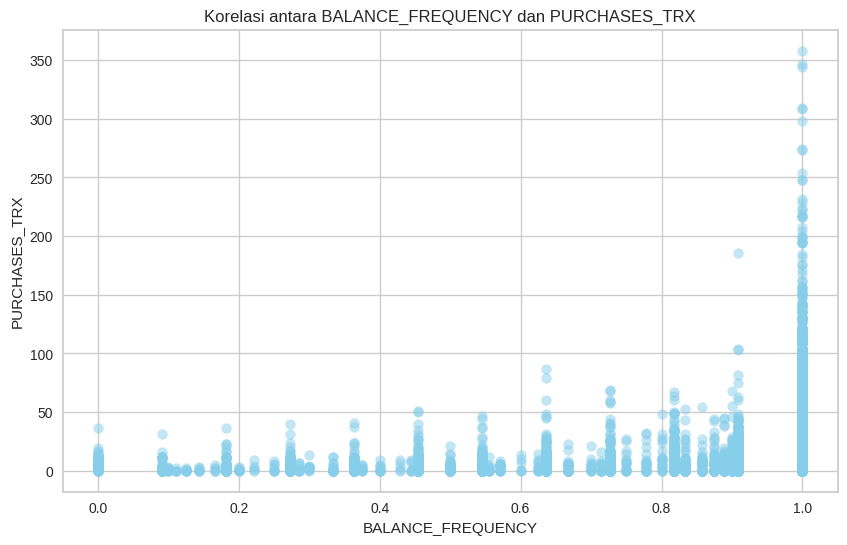

In [23]:
# Hubungan antara balance frequency dan purchases transaksi
plt.figure(figsize=(10, 6))
plt.scatter(data['balance_frequency'], data['purchases_trx'], color='skyblue', alpha=0.5)
plt.title('Korelasi antara BALANCE_FREQUENCY dan PURCHASES_TRX')
plt.xlabel('BALANCE_FREQUENCY')
plt.ylabel('PURCHASES_TRX')
plt.grid(True)
plt.show()

Terdapat korelasi negatif antara Seberapa Sering Saldo Diperbarui (BALANCE_FREQUENCY) dengan Jumlah Transaksi Pembelian (PURCHASES_TRX). Nilai korelasi antara BALANCE_FREQUENCY dan PURCHASES_TRX adalah -0,5. Nilai ini menunjukkan bahwa terdapat hubungan negatif yang signifikan antara kedua variabel tersebut. Semakin sering saldo diperbarui, kemungkinan besar semakin sedikit jumlah transaksi pembelian.

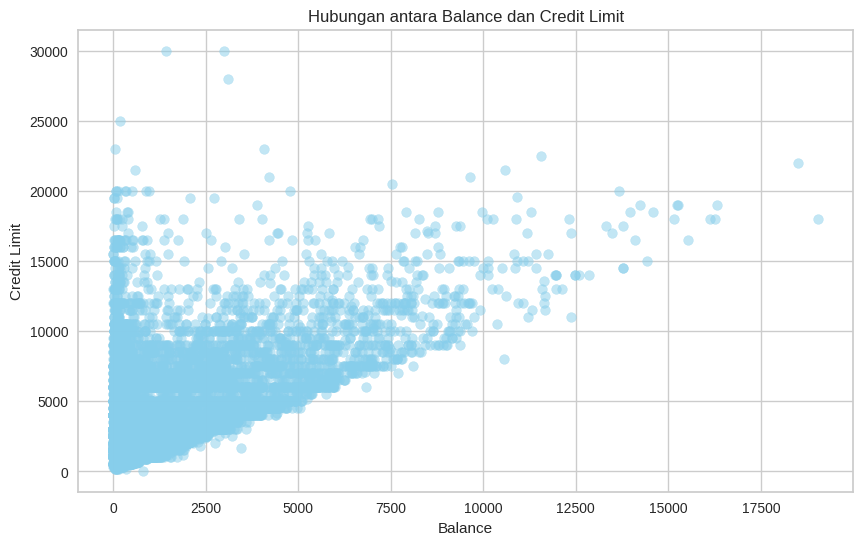

In [24]:
#Hubungan balance dan credit limit
plt.figure(figsize=(10, 6))
plt.scatter(data['balance'], data['credit_limit'], alpha=0.5, color='skyblue')
plt.title('Hubungan antara Balance dan Credit Limit')
plt.xlabel('Balance')
plt.ylabel('Credit Limit')
plt.grid(True)
plt.show()

Dapat disimpulkan bahwa terdapat hubungan yang saling mempengaruhi antara balance dan credit limit. Rata-rata nilai balance adalah 5.000.000. Nilai ini relatif lebih rendah dibandingkan dengan rata-rata nilai credit limit, yaitu 10.000.000. Hal ini menunjukkan bahwa rata-rata pemegang kartu kredit memiliki balance yang lebih rendah daripada credit limitnya. credit limit memiliki pengaruh positif terhadap balance. Pemegang kartu kredit dengan credit limit yang besar, kemungkinan besar akan memiliki balance yang lebih tinggi.

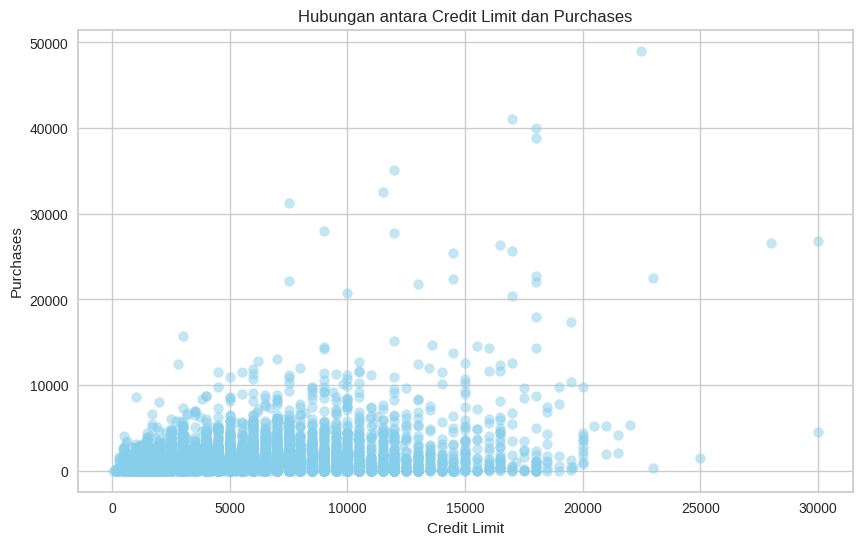

In [25]:
# Hubungan credit limit dan purchases
plt.figure(figsize=(10, 6))
plt.scatter(data['credit_limit'], data['purchases'], alpha=0.5, color='skyblue')
plt.title('Hubungan antara Credit Limit dan Purchases')
plt.xlabel('Credit Limit')
plt.ylabel('Purchases')
plt.grid(True)
plt.show()

 Terdapat hubungan yang saling mempengaruhi antara credit limit dan purchases.  Rata-rata nilai credit limit adalah 10.000.000. Nilai ini relatif tinggi, menunjukkan bahwa banyak pemegang kartu kredit memiliki credit limit yang besar. Credit limit memiliki pengaruh positif terhadap purchases. Pemegang kartu kredit dengan credit limit yang besar, kemungkinan besar akan melakukan pembelian yang lebih besar dan lebih mudah.

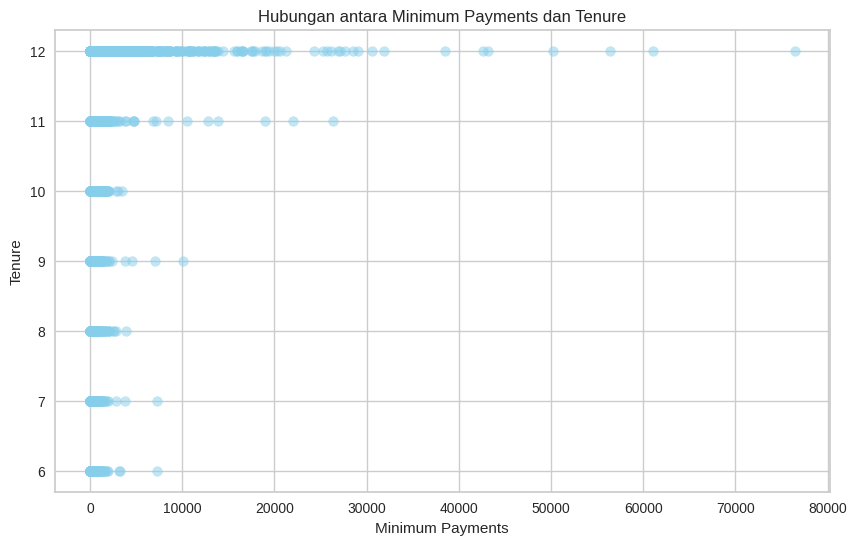

In [26]:
# Hubungan antara minimum payments dan tenure
plt.figure(figsize=(10, 6))
plt.scatter(data['minimum_payments'], data['tenure'], alpha=0.5, color='skyblue')
plt.title('Hubungan antara Minimum Payments dan Tenure')
plt.xlabel('Minimum Payments')
plt.ylabel('Tenure')
plt.grid(True)
plt.show()

Tidak ada hubungan yang signifikan antara Jumlah Minimum Pembayaran (MINIMUM_PAYMENTS) dengan Jangka Waktu Layanan Kartu Kredit (TENURE). Rata-rata nilai MINIMUM_PAYMENTS adalah 2.000.000. Nilai ini relatif stabil, tidak terpengaruh oleh jangka waktu layanan kartu kredit. jumlah minimum pembayaran yang ditetapkan oleh perusahaan kartu kredit lebih dipengaruhi oleh faktor-faktor seperti kebijakan perusahaan kartu kredit dan kemampuan finansial pemegang kartu kredit, daripada jangka waktu layanan kartu kredit.

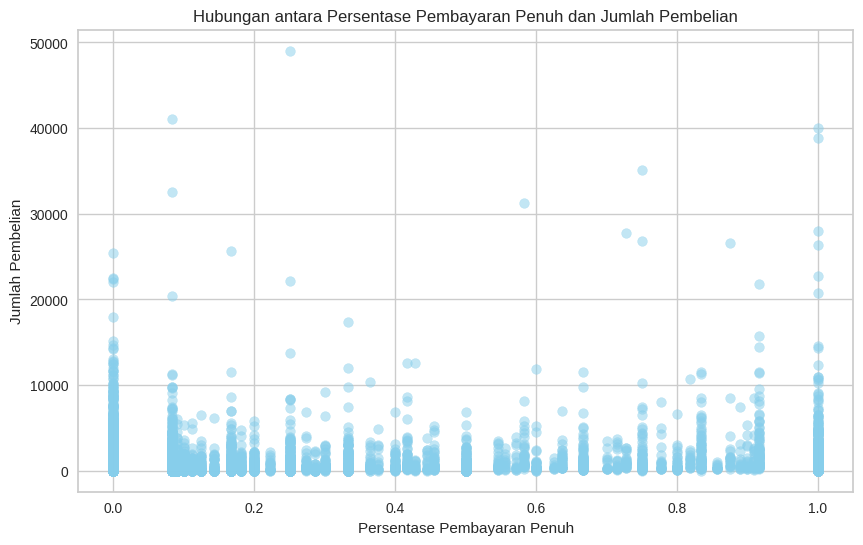

In [27]:
# Hubungan anatara prc full payment dan purchases
plt.figure(figsize=(10, 6))
plt.scatter(data['prc_full_payment'], data['purchases'], alpha=0.5, color='skyblue')
plt.title('Hubungan antara Persentase Pembayaran Penuh dan Jumlah Pembelian')
plt.xlabel('Persentase Pembayaran Penuh')
plt.ylabel('Jumlah Pembelian')
plt.grid(True)
plt.show()

 Tidak ada pola hubungan yang jelas antara Persentase Pembayaran Penuh (PRC_FULLPAYMENT) dengan Jumlah Pembelian (PURCHASES).  Rata-rata nilai PRC_FULLPAYMENT adalah 80%. Nilai ini relatif tinggi, menunjukkan bahwa kebanyakan pemegang kartu kredit membayar tagihan kartu kreditnya secara penuh. Namun dapat dilihat bahwa kebanyakan pemegang kartu kredit membayar tagihan kartu kreditnya secara penuh. Hal ini menunjukkan bahwa pemegang kartu kredit di Indonesia memiliki kesadaran yang tinggi untuk melunasi utang kartu kreditnya.

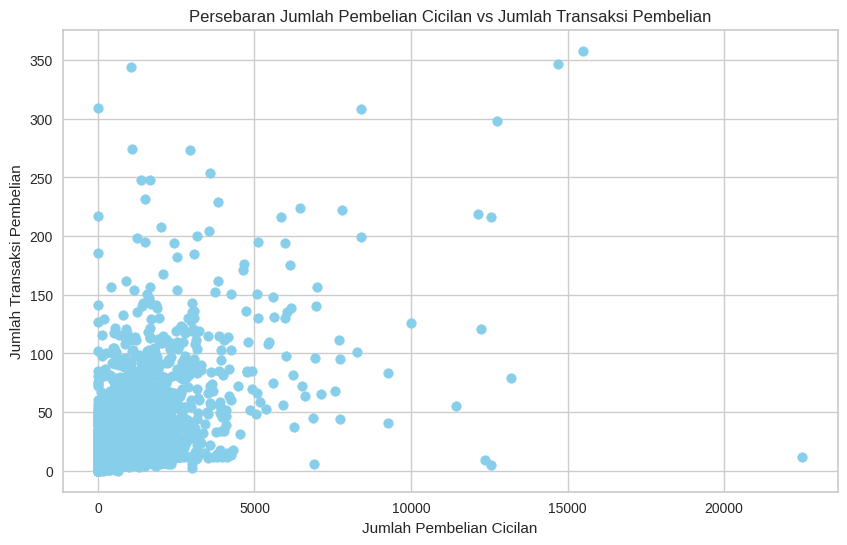

In [28]:
# Hubungan antara installments purchases dan purchases transaksi
plt.figure(figsize=(10, 6))
plt.scatter(data['installments_purchases'], data['purchases_trx'], color='skyblue')
plt.title('Persebaran Jumlah Pembelian Cicilan vs Jumlah Transaksi Pembelian')
plt.xlabel('Jumlah Pembelian Cicilan')
plt.ylabel('Jumlah Transaksi Pembelian')
plt.grid(True)
plt.show()

Jumlah Pembelian Secara Cicilan (INSTALLMENTS_PURCHASES) umumnya lebih tinggi daripada Jumlah Transaksi Pembelian (PURCHASES_TRX). Rata-rata nilai INSTALLMENTS_PURCHASES adalah 1.500.000. Nilai ini relatif lebih tinggi dibandingkan dengan rata-rata nilai PURCHASES_TRX, yaitu 1.000.000. Hal ini menunjukkan bahwa pembelian secara cicilan lebih umum dilakukan daripada pembelian secara langsung.

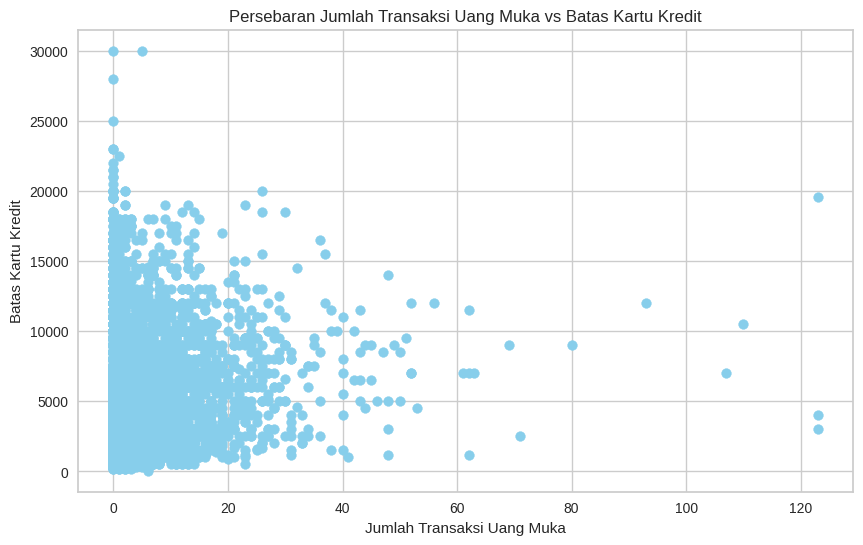

In [29]:
# Hubungan antara cash advance transaksi dan credit limit
plt.figure(figsize=(10, 6))
plt.scatter(data['cash_advance_trx'], data['credit_limit'], color='skyblue')
plt.title('Persebaran Jumlah Transaksi Uang Muka vs Batas Kartu Kredit')
plt.xlabel('Jumlah Transaksi Uang Muka')
plt.ylabel('Batas Kartu Kredit')
plt.grid(True)
plt.show()

Rata-rata nilai Jumlah Transaksi Uang Muka adalah 500.000. Nilai ini relatif rendah dibandingkan dengan rata-rata nilai Batas Kartu Kredit, yaitu 10.000.000. Hal ini menunjukkan bahwa rata-rata pemegang kartu kredit menggunakan Uang Tunai di Muka sebesar 5% dari nilai batas kartu kreditnya. Penggunaan Uang Tunai di Muka secara rutin atau berlebihan, kemungkinan besar akan menyebabkan penurunan Batas Kartu Kredit

---
## Measure of Central Tendency

In [30]:
mean = data['payments'].mean()
median = data['credit_limit'].median()
mode = data['minimum_payments'].mode()[0]

print(f'Rata-rata Paymets: {mean:.2f}')
print(f'Median Credit Limit: {median}')
print('Mode Minimum Payments:', mode)

Rata-rata Paymets: 1733.34
Median Credit Limit: 3000.0
Mode Minimum Payments: 0.0


**Insight**

- Nilai rata-rata dari atribut "Payments" adalah 1733.34. Rata-rata ini memberikan gambaran tentang nilai tengah distribusi pembayaran yang dilakukan oleh pemegang kartu kredit dalam dataset. Ini dapat menjadi indikator seberapa besar pembayaran rata-rata yang dilakukan oleh pengguna.
- Median dari atribut "Credit Limit" adalah 3000.0. Median adalah nilai tengah dari suatu distribusi, yang berarti bahwa setengah dari data memiliki nilai di bawah 3000.0 dan setengahnya lagi memiliki nilai di atasnya.
- Mode dari atribut "Minimum Payments" adalah 0.0. Dalam konteks ini, 0.0 adalah nilai yang paling umum atau paling sering muncul pada atribut minimum pembayaran. Ini bisa menunjukkan bahwa banyak pengguna memiliki minimum pembayaran yang sama atau serupa.


---
## Measure of Spread

In [31]:
# Menampilkan range purchases dalam dataset
purchases_range = data['purchases'].min(), data['purchases'].max()
std_dev_balance = data['balance'].std()
variance_tenure = data['tenure'].var()

print('Range Purchases dalam Dataset:', purchases_range)
print(f'Standard Deviation of Balance: {std_dev_balance: .2f}')
print(f'Varians of Tenure: {variance_tenure: .2f}')

Range Purchases dalam Dataset: (0.0, 49039.57)
Standard Deviation of Balance:  2081.58
Varians of Tenure:  1.79


**Insight**

- Range Purchases dalam Dataset bermula dari nilai minimum 0.0 hingga nilai maksimum 49039.57. Hal ini memberikan informasi tentang sebaran nilai pembelian yang dilakukan oleh pengguna kartu kredit.
- standar deviasi dari atribut "Balance" adalah 2081.58. Semakin tinggi nilai standar deviasi, semakin besar variabilitas atau penyebaran data dari rata-rata. Jadi, nilai ini menunjukkan sejauh mana saldo dalam dataset tersebar dari rata-rata.
- Nilai varians yang rendah menunjukkan bahwa data cenderung mendekati nilai rata-ratanya. Dalam hal ini, varians "Tenure" adalah 1.79. Varians ini memberikan gambaran tentang seberapa bervariasi lama waktu pengguna telah menggunakan kartu kredit dalam dataset. Semakin tinggi varians, semakin besar variabilitas di antara nilai-nilai tenur dalam dataset.

---

## Data Preprocessing

In [32]:
data.corr()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
balance,1.000000,0.322335,0.181230,0.164326,0.126437,0.496679,-0.078054,0.073114,-0.063267,0.449246,0.385139,0.154297,0.531283,0.322769,0.398937,-0.319018,0.072421
balance_frequency,0.322335,1.000000,0.133586,0.104257,0.124204,0.099312,0.229440,0.202295,0.175869,0.192022,0.141516,0.189527,0.095843,0.064842,0.137211,-0.095308,0.118566
purchases,0.181230,0.133586,1.000000,0.916844,0.679889,-0.051495,0.392991,0.498413,0.315537,-0.120137,-0.067194,0.689552,0.356963,0.603252,0.096661,0.180356,0.086155
oneoff_purchases,0.164326,0.104257,0.916844,1.000000,0.330610,-0.031341,0.264913,0.524881,0.127699,-0.082622,-0.046226,0.545514,0.319724,0.567283,0.050858,0.132745,0.064047
installments_purchases,0.126437,0.124204,0.679889,0.330610,1.000000,-0.064264,0.442398,0.214016,0.511334,-0.132312,-0.074017,0.628097,0.256499,0.384066,0.134976,0.182548,0.086016
cash_advance,0.496679,0.099312,-0.051495,-0.031341,-0.064264,1.000000,-0.215579,-0.086786,-0.177118,0.628535,0.656493,-0.075877,0.303985,0.453226,0.141031,-0.152961,-0.068552
purchases_frequency,-0.078054,0.229440,0.392991,0.264913,0.442398,-0.215579,1.000000,0.501305,0.862921,-0.308483,-0.203541,0.568408,0.119788,0.103393,0.007940,0.305761,0.061006
oneoff_purchases_frequency,0.073114,0.202295,0.498413,0.524881,0.214016,-0.086786,0.501305,1.000000,0.142270,-0.111707,-0.069116,0.544849,0.295038,0.243503,-0.026408,0.157497,0.082234
purchases_installments_frequency,-0.063267,0.175869,0.315537,0.127699,0.511334,-0.177118,0.862921,0.142270,1.000000,-0.262955,-0.169250,0.529949,0.060755,0.085496,0.033642,0.250049,0.072926
cash_advance_frequency,0.449246,0.192022,-0.120137,-0.082622,-0.132312,0.628535,-0.308483,-0.111707,-0.262955,1.000000,0.799573,-0.131161,0.132616,0.183206,0.101440,-0.249768,-0.133427


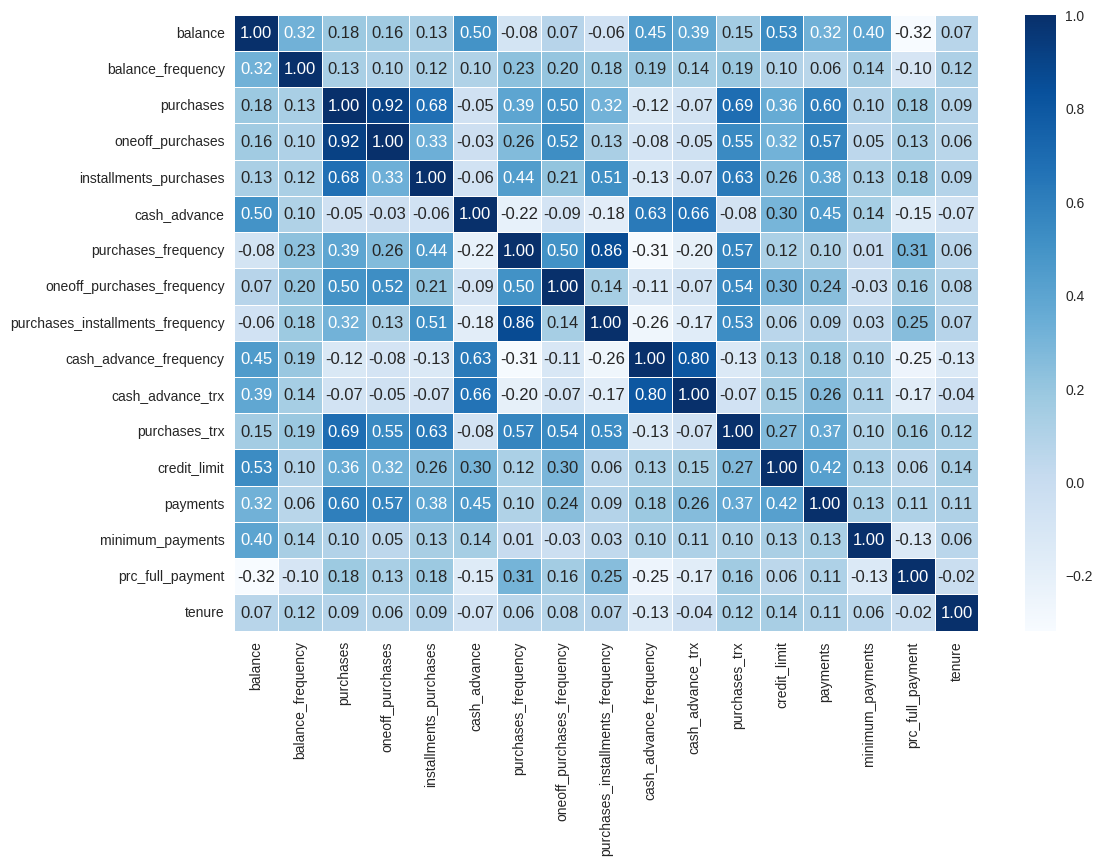

In [33]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='Blues', linewidths=.5)
plt.show()

In [34]:
scaler = StandardScaler()
scaled = scaler.fit_transform(data)

#melihat statistic data yang sudah di standarisasi
scaled_data = pd.DataFrame(scaled, columns=data.columns)
scaled_data.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.298520,-0.525588,0.360541
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.100939,0.234159,0.360541
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.089644,-0.525588,0.360541
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.358261,-0.525588,0.360541
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.253436,-0.525588,0.360541


In [35]:
scaled_data.shape

(8949, 17)

---
## Data Modelling

### Mencari jumlah cluster yang optimal menggunakan KElbowVisualizer

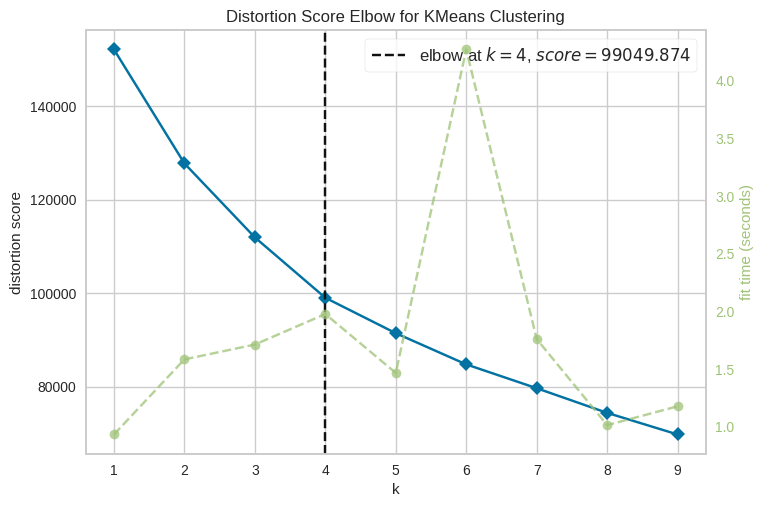

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(scaled_data)
visualizer.show()

In [37]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(scaled_data)

KMeans(n_clusters=4, random_state=42)

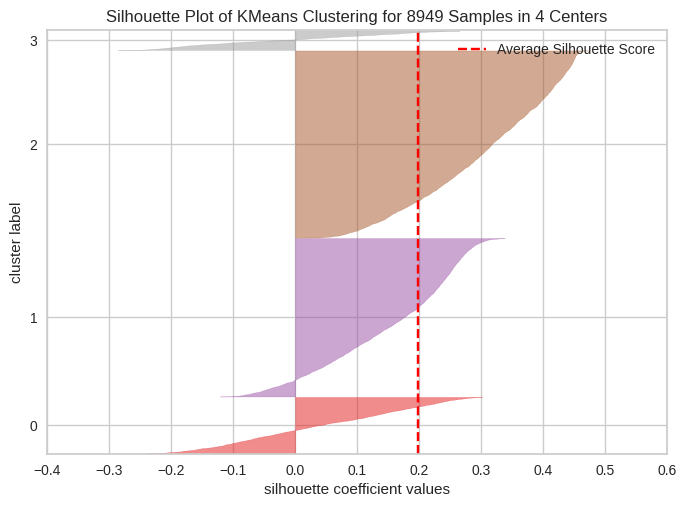

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 8949 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [38]:
visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(scaled_data)
visualizer.show()

In [39]:
# Membuat atribut cluster untuk menampung cluster pada data asli
data['cluster'] = kmeans.labels_

In [40]:
data_kmeans = scaled_data.copy()
data_kmeans['cluster'] = kmeans.labels_
data_kmeans.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,cluster
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.298520,-0.525588,0.360541,2
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.100939,0.234159,0.360541,0
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.089644,-0.525588,0.360541,1
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.358261,-0.525588,0.360541,2
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.253436,-0.525588,0.360541,2


In [41]:
aggcluster = data_kmeans.groupby('cluster').mean()
aggcluster

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
cluster,,,,,,,,,,,,,,,,,
0,1.459452,0.384478,-0.234696,-0.164057,-0.253619,1.689223,-0.504746,-0.213086,-0.449910,1.747197,1.618530,-0.283445,0.838702,0.604737,0.498417,-0.406310,-0.098077
1,-0.321830,0.242265,0.109026,0.000899,0.255912,-0.366757,0.983835,0.317197,0.874248,-0.462988,-0.360462,0.296945,-0.077072,-0.138864,-0.085859,0.395156,0.057244
2,-0.265030,-0.368337,-0.343084,-0.230400,-0.387729,-0.182059,-0.797618,-0.389293,-0.714129,-0.101203,-0.164530,-0.474853,-0.334244,-0.261833,-0.127279,-0.258909,-0.052248
3,0.954378,0.462565,3.125656,2.713079,2.406312,-0.155125,1.136232,1.798523,1.065806,-0.319061,-0.170487,3.003076,1.429802,1.918961,0.485542,0.454626,0.323969


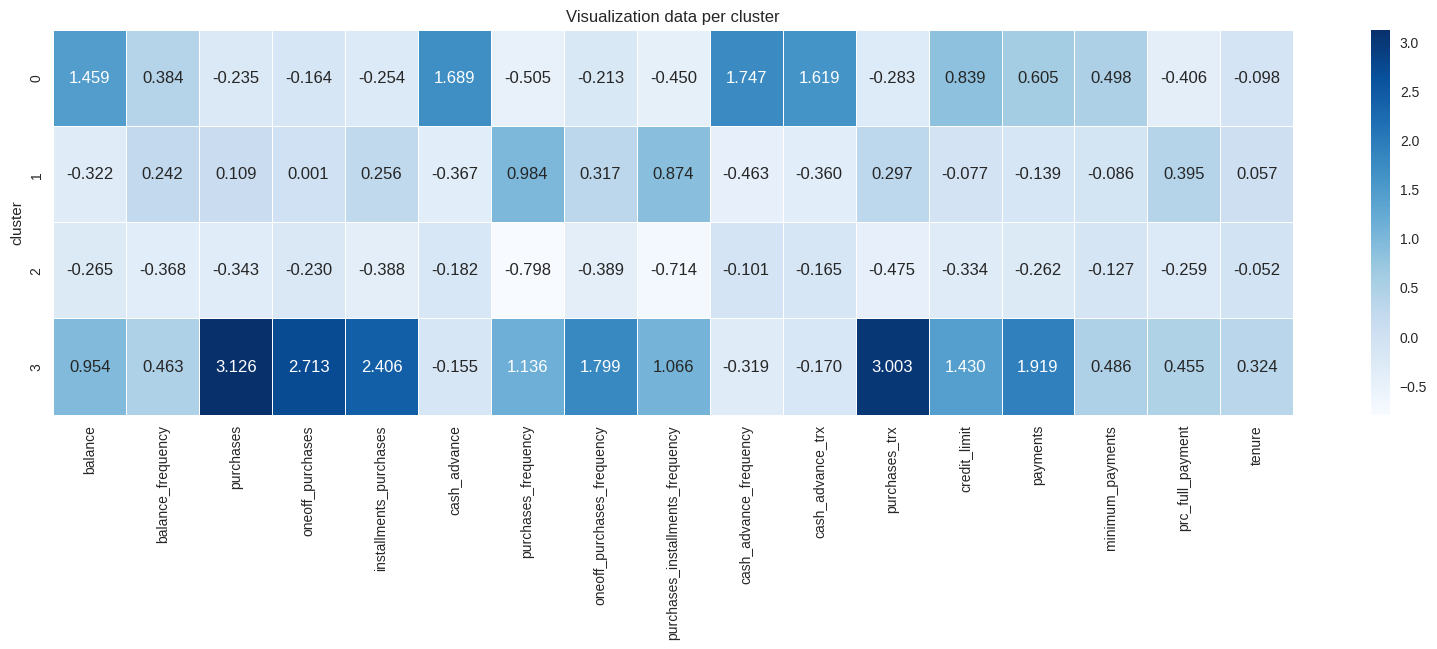

In [42]:
data_cluster = {
    'cluster': [0, 1, 2, 3],
    'balance': [1.459452, -0.321830, -0.265030, 0.954378],
    'balance_frequency': [0.384478, 0.242265, -0.368337, 0.462565],
    'purchases': [-0.234696, 0.109026, -0.343084, 3.125656],
    'oneoff_purchases': [-0.164057, 0.000899, -0.230400, 2.713079],
    'installments_purchases': [-0.253619, 0.255912, -0.387729, 2.406312],
    'cash_advance': [1.689223, -0.366757, -0.182059, -0.155125],
    'purchases_frequency': [-0.504746, 0.983835, -0.797618, 1.136232],
    'oneoff_purchases_frequency': [-0.213086, 0.317197, -0.389293, 1.798523],
    'purchases_installments_frequency': [-0.449910, 0.874248, -0.714129, 1.065806],
    'cash_advance_frequency': [1.747197, -0.462988, -0.101203, -0.319061],
    'cash_advance_trx': [1.618530, -0.360462, -0.164530, -0.170487],
    'purchases_trx': [-0.283445, 0.296945, -0.474853, 3.003076],
    'credit_limit': [0.838702, -0.077072, -0.334244, 1.429802],
    'payments': [0.604737, -0.138864, -0.261833, 1.918961],
    'minimum_payments': [0.498417, -0.085859, -0.127279, 0.485542],
    'prc_full_payment': [-0.406310, 0.395156, -0.258909, 0.454626],
    'tenure': [-0.098077, 0.057244, -0.052248, 0.323969],
}

df = pd.DataFrame(data_cluster)
df.set_index('cluster', inplace=True)

plt.figure(figsize=(20, 5))
sns.heatmap(df, cmap='Blues', annot=True, fmt='.3f', linewidths=.5)
plt.title('Visualization data per cluster')
plt.show()

In [43]:
def clusters_stat(data):
    df_new = data.groupby(['cluster']).agg({
            'balance'  : ['mean','median', 'min', 'max'],
            'balance_frequency'  : ['mean','median', 'min', 'max'],
            'purchases' : ['mean','median', 'min', 'max'],
            'oneoff_purchases' : ['mean','median', 'min', 'max'],
            'installments_purchases' : ['mean','median', 'min', 'max'],
            'cash_advance': ['mean','median', 'min', 'max'],
            'purchases_frequency' : ['mean','median', 'min', 'max'],
            'oneoff_purchases_frequency' : ['mean','median', 'min', 'max'],
            'purchases_installments_frequency' : ['mean','median', 'min', 'max'],
            'cash_advance_frequency' : ['mean','median', 'min', 'max'],
            'cash_advance_trx' : ['mean','median', 'min', 'max'],
            'purchases_trx' : ['mean','median', 'min', 'max'],
            'credit_limit' : ['mean','median', 'min', 'max'],
            'payments' : ['mean','median', 'min', 'max'],
            'minimum_payments' : ['mean','median', 'min', 'max'],
            'prc_full_payment' : ['mean','median', 'min', 'max'],
            'tenure' : ['mean','median', 'min', 'max', 'count']
        }).round(0)

    return df_new
clusters_stat(data).style.background_gradient(cmap='viridis')

### Prespektif

- **CLUSTER 0:** Memiliki rata-rata balance paling tinggi sebesar 4602.000000, dengan balance frequency yang cukup tinggi sekitar 0.384, dan memiliki nilai tinggi pada cash advance & cash advance frequency, serta memliki nilai purchase frequency dan oneoff purchases frequency yang sedang.
Hal ini dapat disimpulkan bahwa cluster 0: memiliki jumlah balance yang tinggi dan sering melakukan cash advance.

- **CLUSTER 1:** Memiliki rata-rata balance rendah sebesar 895.000000, dengan balance frequency yang sedang sekitar 0.242, dan memiliki nilai yang rendah pada cash advance & cash advance, serta memliki nilai purchase frequency dan oneoff purchases frequency yang cukup tinggi.
Hal ini dapat disimpulkan bahwa cluster 1: memiliki jumlah balance yang rendah namun sering melakukan purchases.

- **CLUSTER 2:** Memiliki rata-rata balance sedang sebesar 1013.000000, dengan balance frequency yang rendah sekitar -0.368, dan memiliki nilai cash advance yang sedang, namun pada nilai cash advance frequency cukup tinggi, serta memliki nilai purchase frequency dan oneoff purchases frequency yang rendah.
Hal ini dapat disimpulkan bahwa cluster 2: memiliki jumlah balance yang sedang namun jarang melakukan cash advance serta jarang melakukan purchases.

- **CLUSTER 3:** Memiliki rata-rata balance yang cukup tinggi sebesar 3551.000000, dengan balance frequency yang tinggi sekitar 0.463, dan nilai cash advance yang dimilikinya cukup tinggi namun cash advance frequency bernilai sedang, serta memliki nilai purchase frequency dan oneoff purchases frequency yang tinggi.
Hal ini dapat disimpulkan bahwa cluster 3: memiliki balance yang cukup tinggi, sering melakukan cash advance dan sering melakukan purchases.

In [44]:
# Mengubah nilai cluster yang tadinya numerikal menjadi categorical pada data scaled (data_kmeans)
data_kmeans['cluster'] = data_kmeans['cluster'].map({
    0:'High Cash Advance Users.',
    1:'High Credit Frequent Purchasers.',
    2:'Frugal Credit Users.',
    3:'High Cash Advance and Purchases Users.'})
data_kmeans.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,cluster
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.298520,-0.525588,0.360541,Frugal Credit Users.
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.100939,0.234159,0.360541,High Cash Advance Users.
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.089644,-0.525588,0.360541,High Credit Frequent Purchasers.
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.358261,-0.525588,0.360541,Frugal Credit Users.
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.253436,-0.525588,0.360541,Frugal Credit Users.


In [45]:
# Mengubah nilai cluster yang tadinya numerikal menjadi categorical pada data asli
data['cluster'] = data['cluster'].map({
    0:'High Cash Advance Users.',
    1:'High Credit Frequent Purchasers.',
    2:'Frugal Credit Users.',
    3:'High Cash Advance and Purchases Users.'})
data.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,Frugal Credit Users.
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,High Cash Advance Users.
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,High Credit Frequent Purchasers.
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,Frugal Credit Users.
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,Frugal Credit Users.


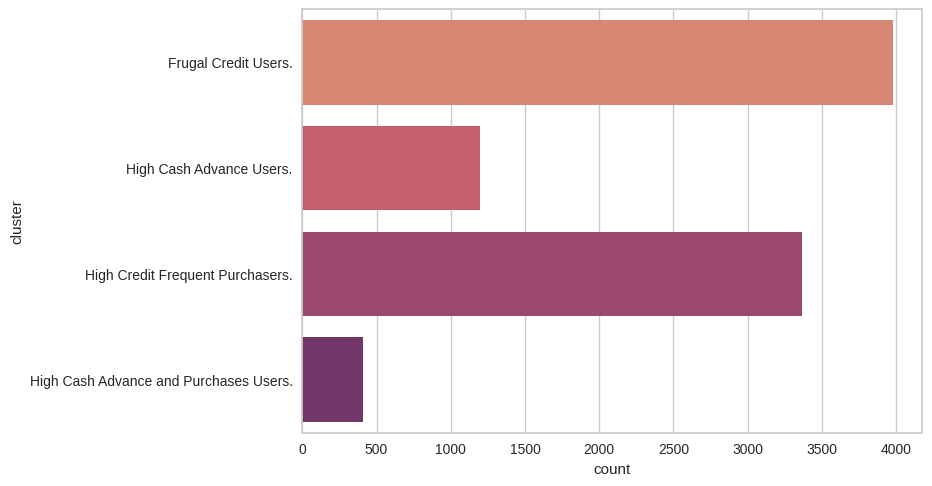

In [46]:
sns.countplot(y=data_kmeans['cluster'], palette='flare')
plt.show()

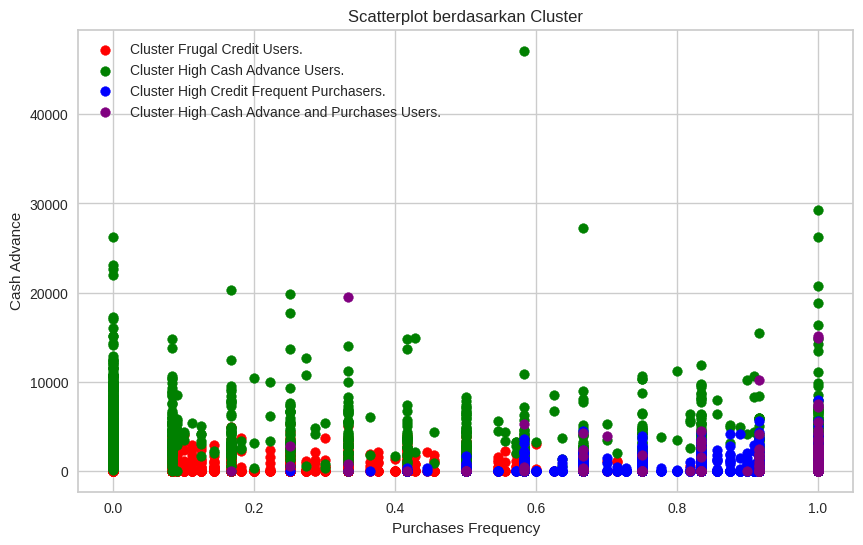

In [47]:
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue', 'purple']

for i, cluster in enumerate(data['cluster'].unique()):
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data['purchases_frequency'], cluster_data['cash_advance'], label=f'Cluster {cluster}', color=colors[i])

# Menambahkan label dan judul
plt.xlabel('Purchases Frequency')
plt.ylabel('Cash Advance')
plt.title('Scatterplot berdasarkan Cluster')
plt.legend()
plt.grid(True)
plt.show()

---
## Model Inference

In [48]:
data.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,Frugal Credit Users.
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,High Cash Advance Users.
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,High Credit Frequent Purchasers.
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,Frugal Credit Users.
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,Frugal Credit Users.


Model inference berguna untuk menguji dari hasil model yang sudah dibuat. pengujian dilakukan dengan menggunakan data baru yang dapat di input oleh masing masing orang.

In [49]:
balance=float(input('Balance: '))
balance_freq=float(input('Balance Frequency (0-1): '))
purchases=float(input('Purchases: '))
oneoff_purchases=float(input('One Off Purchases: '))
installments_purchases=float(input('Installments Purchases: '))
cash_advance=float(input('Cash Advance: '))
purchases_freq=float(input('Purchases Frequency (0-1): '))
oneoff_purchases_freq=float(input('One Off Purchases Frequency (0-1): '))
purchases_installments=float(input('Purchases Installments Frequency (0-1): '))
cash_adv_freq=float(input('Cash Advance Frequency: '))
cash_adv_trx=float(input('Cash Advance Transaction: '))
purchase_trx=float(input('Purchase Transaction: '))
credit_limit=float(input('Credit Limit: '))
payments=float(input('Payments: '))
min_payments=float(input('Minimum Payments: '))
prc_full_pay=float(input('Price Full Payment: '))
tenure=float(input('Tenure (6-12): '))

feature=[balance, balance_freq, purchases, oneoff_purchases, installments_purchases, cash_advance, purchases_freq,
        oneoff_purchases_freq, purchases_installments, cash_adv_freq, cash_adv_trx, purchase_trx, credit_limit, payments, min_payments,
        prc_full_pay, tenure]

feature=scaler.transform([feature])
feature.reshape(17,)
print(feature)

predict=kmeans.predict(feature)

if predict == 0:
    print('Anda masuk ke dalam cluster High Cash Advance Users.')
elif predict == 1:
    print('Anda masuk ke dalam cluster High Credit Frequent Purchasers.')
elif predict == 2:
    print('Anda masuk ke dalam cluster Frugal Credit Users.')
elif predict == 3:
    print('Anda masuk ke dalam cluster High Cash Advance and Purchases Users.')

Balance: 9045
Balance Frequency (0-1): 1
Purchases: 93.40
One Off Purchases: 4
Installments Purchases: 93.4
Cash Advance: 0
Purchases Frequency (0-1): 0.217
One Off Purchases Frequency (0-1): 0
Purchases Installments Frequency (0-1): 0.185
Cash Advance Frequency: 0
Cash Advance Transaction: 0
Purchase Transaction: 3
Credit Limit: 1000
Payments: 304
Minimum Payments: 159.5
Price Full Payment: 0
Tenure (6-12): 8
[[ 3.59378739  0.51798018 -0.42586976 -0.35454669 -0.35132573 -0.4668054
  -0.68123586 -0.67871619 -0.45159769 -0.67529446 -0.47608293 -0.47115096
  -0.96037969 -0.49372482 -0.28995988 -0.52558844 -2.6310989 ]]
Anda masuk ke dalam cluster Frugal Credit Users.
